**Content**

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwation.

# Exploratory Data Analysis

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cred_fraud = pd.read_csv('creditcard.csv')

In [3]:
cred_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
cred_fraud.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
cred_fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# Print the shape of the dataset (rows and columns)
print('Shape Of The Dataset', cred_fraud.shape)

# Print the unique class categories in the 'Class' column
print('Class Categories', cred_fraud['Class'].unique())

# Print the number of records with the class value 0 in the 'Class' column
print('Number Of Records With The Class Value 0 (Normal Records): ', (cred_fraud.Class == 0).sum())

# Print the number of records with the class value 1 in the 'Class' column
print('Number Of Records With The Class Value 1 (Fraud Records): ', (cred_fraud.Class == 1).sum())

Shape Of The Dataset (284807, 31)
Class Categories [0 1]
Number Of Records With The Class Value 0 (Normal Records):  284315
Number Of Records With The Class Value 1 (Fraud Records):  492


In [7]:
# Trnasactions histogram to determine the fraud and normal activities

In [8]:
fraud = cred_fraud[cred_fraud['Class']==1]

normal = cred_fraud[cred_fraud['Class']==0]

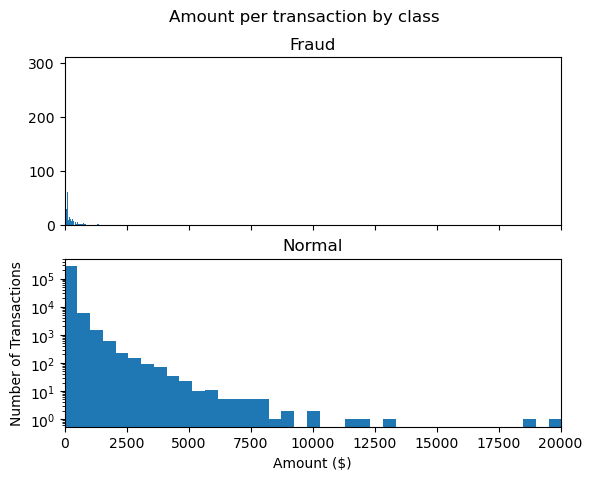

In [9]:
f, (ax1,ax2) = plt.subplots(2,1,sharex=True)
f.suptitle('Amount per transaction by class')
ax1.hist(fraud.Amount,bins=50)
ax1.set_title('Fraud')
ax2.hist(normal.Amount,bins=50)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0,20000))
plt.yscale('log')
plt.show()

For fraud the transactions are very few compared to normal transactions which has high number of transactions

Text(0, 0.5, 'Frequency')

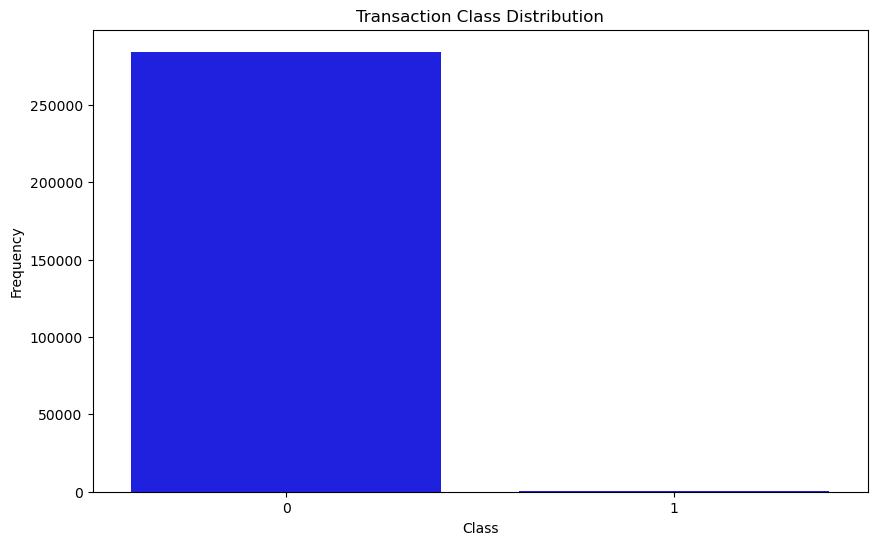

In [10]:
# Create a count plot to visualize the distribution of classes in the 'Class' column of the DataFrame df
plt.figure(figsize=(10,6))
sns.countplot(x='Class', data=cred_fraud,color='blue')
plt.title('Transaction Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')

Credit card fraud datasets, including this one, are typically highly imbalanced because occurrences of fraud are rare compared to normal transactions.

<Axes: title={'center': 'Correlation Of Features With Target Variable'}>

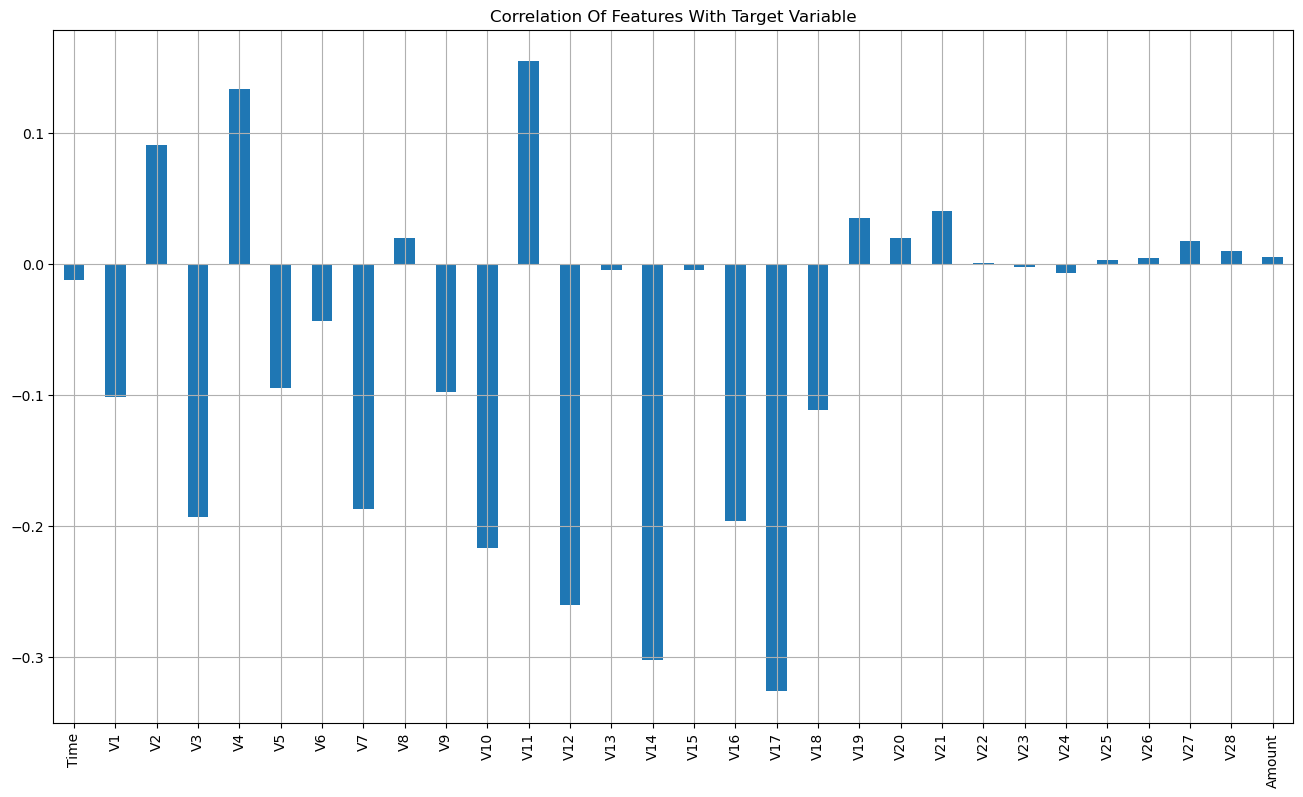

In [11]:
# Calculate the correlation coefficients between the 'Class' column and the first 30 columns 
x = cred_fraud.corr()['Class'][:30]

# Create a bar plot to visualize the correlation of features with the target variable 'Class'
x.plot.bar(figsize=(16, 9), title="Correlation Of Features With Target Variable", grid=True)

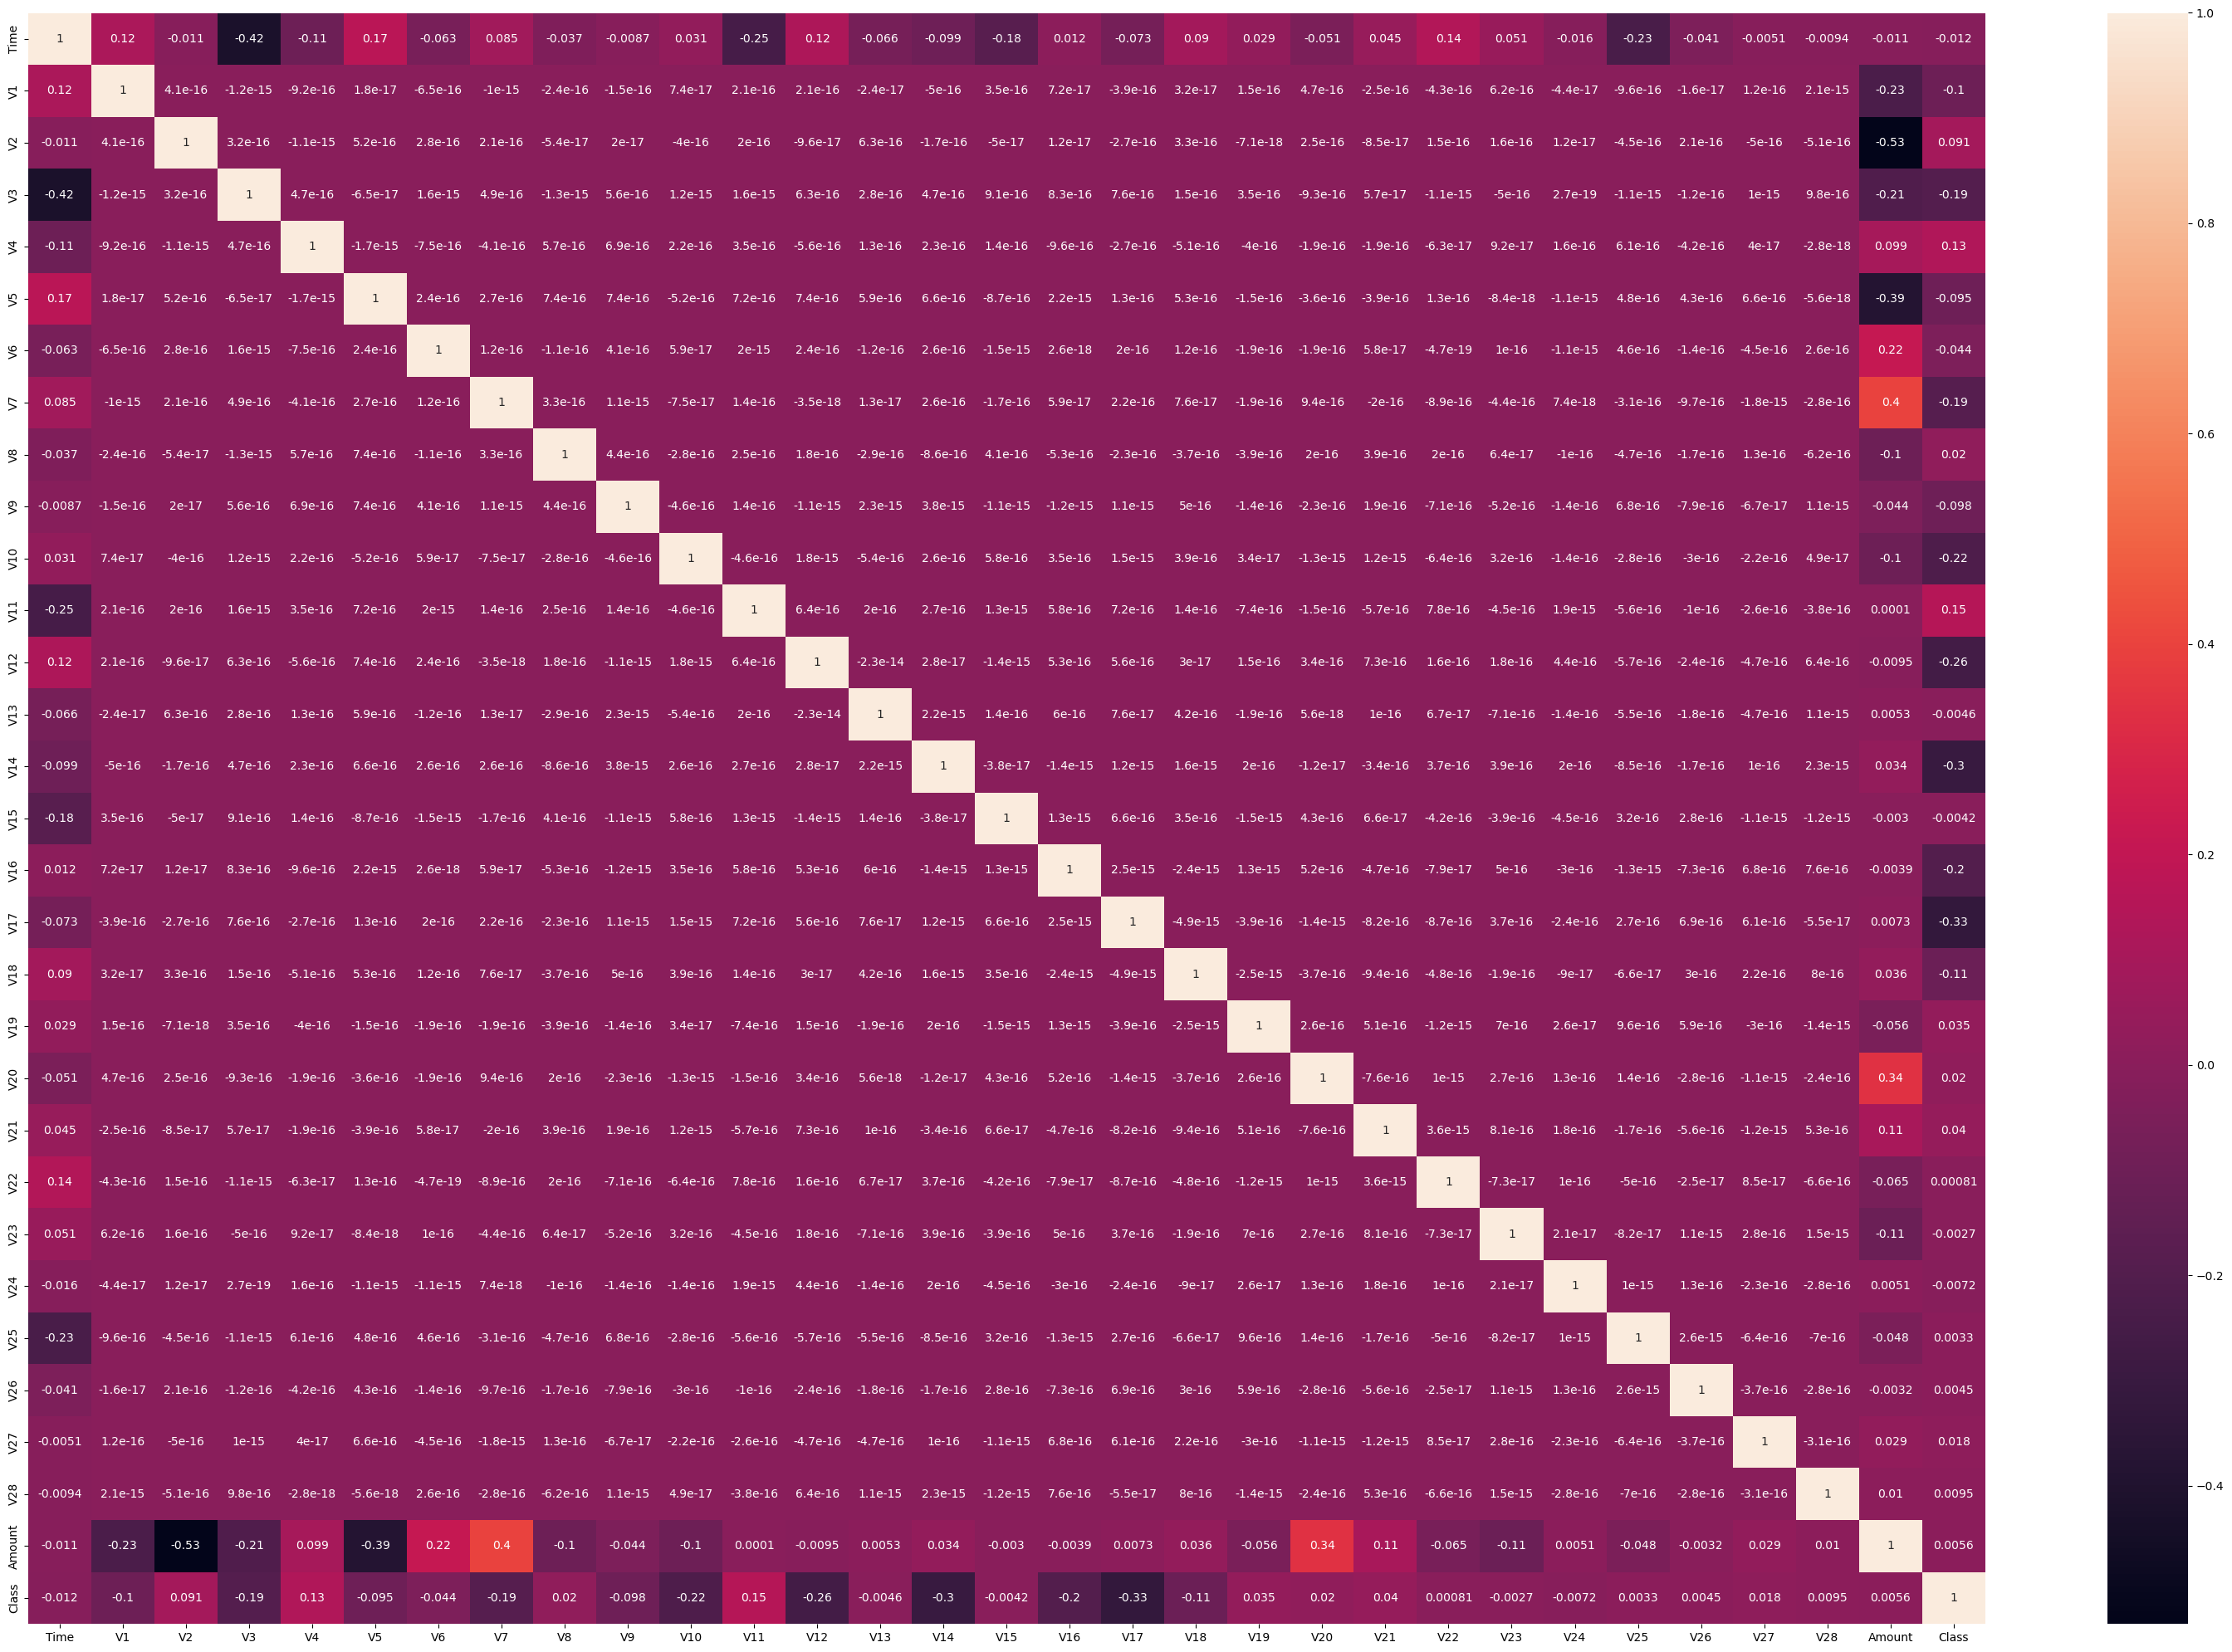

In [14]:
# Create a figure with a specific size for the heatmap
plt.figure(figsize=(30,20))

# Create a heatmap to visualize the correlation matrix of the DataFrame df2
sns.heatmap(cred_fraud.corr(numeric_only=True),annot=True)

plt.tight_layout()

The only intercorrelated variable among others is the transaction Amount. However, this variable shows no correlation with the target variable, so it will also be removed.

## Handling Class Imbalance

This dataset consists of:

1. Number of records with the class value 0: 284,315
2. Number of records with the class value 1: 492

Using this dataset as it is would be a fatal mistake due to its severe class imbalance.

Using the data:
1. The overwhelming majority of records belong to the non-fraudulent class (class 0), making up over 99% of the dataset.2. 
Models trained on imbalanced data may prioritize accuracy on the majority class while neglecting the minority class (fraudulent transactions). This can result in poor performance in detecting fraud.

In [16]:
from imblearn.under_sampling import RandomUnderSampler

# Separate features (X) and target (y)
X = cred_fraud.drop('Class', axis=1)
y = cred_fraud['Class']

# Initialize RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Fit and apply the resampler to the data
X_resampled, y_resampled = rus.fit_resample(X, y)

# Convert the resampled data back to a DataFrame
downsampled_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Class'])], axis=1)


downsampled_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
138028,82450.0,1.314539,0.590643,-0.666593,0.716564,0.301978,-1.125467,0.388881,-0.288390,-0.132137,...,-0.170307,-0.429655,-0.141341,-0.200195,0.639491,0.399476,-0.034321,0.031692,0.76,0
63099,50554.0,-0.798672,1.185093,0.904547,0.694584,0.219041,-0.319295,0.495236,0.139269,-0.760214,...,0.202287,0.578699,-0.092245,0.013723,-0.246466,-0.380057,-0.396030,-0.112901,4.18,0
73411,55125.0,-0.391128,-0.245540,1.122074,-1.308725,-0.639891,0.008678,-0.701304,-0.027315,-2.628854,...,-0.133485,0.117403,-0.191748,-0.488642,-0.309774,0.008100,0.163716,0.239582,15.00,0
164247,116572.0,-0.060302,1.065093,-0.987421,-0.029567,0.176376,-1.348539,0.775644,0.134843,-0.149734,...,0.355576,0.907570,-0.018454,-0.126269,-0.339923,-0.150285,-0.023634,0.042330,57.00,0
148999,90434.0,1.848433,0.373364,0.269272,3.866438,0.088062,0.970447,-0.721945,0.235983,0.683491,...,0.103563,0.620954,0.197077,0.692392,-0.206530,-0.021328,-0.019823,-0.042682,0.00,0


In [17]:
# Display the shape of the downsampled DataFrame downsampled_df
downsampled_df.shape

(984, 31)

**Outlier**

<Axes: xlabel='Class', ylabel='count'>

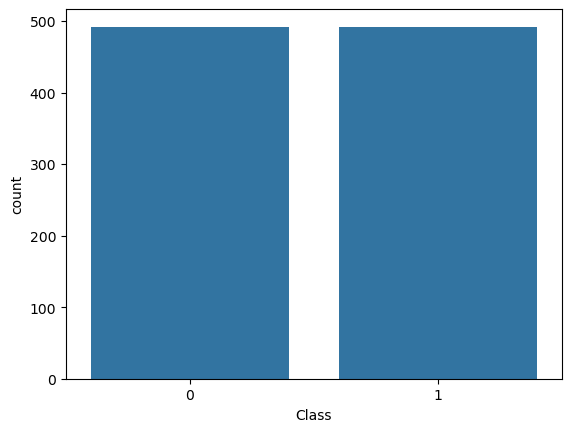

In [29]:
# Create a count plot to visualize the distribution of classes in the 'Class' column of the downsampled DataFrame downsampled_df
sns.countplot(x='Class', data=downsampled_df)

<Axes: xlabel='V11', ylabel='V17'>

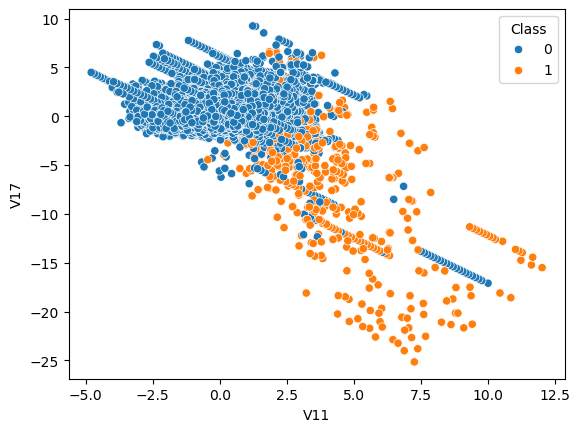

In [13]:
# Plotting using seaborn scatterplot
sns.scatterplot(x='V11', y='V17', hue='Class', data=cred_fraud)

The blue dots represent normal transactions, tightly clustered with very few outliers. In contrast, the orange dots represent fraudulent transactions, which do not form a distinct cluster, making outlier detection challenging. Is this pattern consistent across all variables or just in this example?

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import classification_report, confusion_matrix

# Original imbalanced data (df2)
X = cred_fraud.drop(columns='Class')
y = cred_fraud['Class']

# Step 1: Split the original data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101,stratify=y)

# Step 2: Downsample only the training data to ensure no data leakage
train_data = X_train.copy()
train_data['Class'] = y_train

# Separate the majority and minority classes in the training data
majority_class = train_data[train_data['Class'] == 0]  # Assuming 0 is the majority class
minority_class = train_data[train_data['Class'] == 1]  # Assuming 1 is the minority class

# Downsample the majority class
majority_downsampled = resample(majority_class, 
                                replace=False,    # sample without replacement
                                n_samples=len(minority_class),  # match minority class size
                                random_state=42)  # reproducible results

# Combine the downsampled majority class with the minority class
downsampled_train_data = pd.concat([majority_downsampled, minority_class])

# Step 3: Prepare the downsampled training set and the original test set
X_train_downsampled = downsampled_train_data.drop(columns='Class')
y_train_downsampled = downsampled_train_data['Class']

In [37]:
!pip install lazypredict

In [40]:
from lazypredict.Supervised import LazyClassifier

# Step 4: Initialize LazyClassifier and fit the model
clf = LazyClassifier(random_state=101)

# Fit the models using the downsampled training data and test on the original test set
models, predictions = clf.fit(X_train_downsampled, X_test, y_train_downsampled, y_test)

# Display the performance of the models
models

 97%|███████████████████████████████████████████████████████████████████████████████▎  | 30/31 [00:10<00:00,  4.46it/s]

[LightGBM] [Info] Number of positive: 394, number of negative: 394
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000661 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7649
[LightGBM] [Info] Number of data points in the train set: 788, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [00:10<00:00,  2.99it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
CalibratedClassifierCV,0.98,0.96,0.96,0.99,0.15
XGBClassifier,0.97,0.95,0.95,0.98,0.17
LGBMClassifier,0.97,0.95,0.95,0.98,0.25
SGDClassifier,0.96,0.95,0.95,0.98,0.06
ExtraTreesClassifier,0.98,0.95,0.95,0.99,0.54
LogisticRegression,0.97,0.95,0.95,0.98,0.06
AdaBoostClassifier,0.95,0.95,0.95,0.97,1.03
LinearSVC,0.97,0.95,0.95,0.98,0.05
RandomForestClassifier,0.97,0.95,0.95,0.98,0.51
